In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from utils.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'ISRG',
    'JD', 'KNSL', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA',
    'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON',
    'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU',
    'RVLV', 'SAM', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TMUS', 'TREX', 'TSCO', 'TSLA', 'TTC', 'TTD', 'TTWO',
    'TWLO', 'TYL', 'UPST', 'VEEV', 'VRTX', 'XPEV',
    'ZBRA', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'APPS', 'BROS', 'BRTX', 'BTTR', 'BYRN',
    'CEF', 'CGAU', 'CPRX', 'CTGO', 'DQ', 'DTST', 'DUOL', 'EA', 'EP',
    'EPAM', 'EPSN',  'ESOA', 'FCUV', 'FNV', 'FSI', 'GCBC', 'GME',
    'GNRC', 'GTLS', 'HBM', 'HMY', 'IDR', 'INTG', 'INTZ', 'LPLA',
    'MCVT', 'MICS', 'MNMD', 'MOBQ', 'MTA', 'OMQS', 'PACB', 'PCRX',
    'POWW', 'PRPH', 'QLYS', 'RVP', 'RVYL', 'SAND', 'SPWR', 'STKL',
    'UI', 'VIRT', 'VLD', 'WAVD', 'WKHS', 'WRN', 'XPEV', 'ZEST',
    'ZYXI']
BEST_WEIGHTED =  [
    'AREN', 'BB', 'CHUY', 'CSIQ', 'CUBI', 'DYAI', 'FSM', 'LFMD',
    'LVS', 'OPNT', 'OSTK', 'PBF', 'PFIE', 'SBSW', 'SSTK',
    'URBN', 'VTSI', 'WYNN']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-02-18', datetime.date(2023, 2, 18))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  162 of 162 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMZN... ANET... APPS... AREN... ASML... AXON... BB... BROS... BRTX... BTTR... BYND... BYRN... CEF... CGAU... CHUY... CHWY... CPRX... CRWD... CSIQ... CTGO... CUBI... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... EPAM... EPSN... ESOA... ETSY... FCUV... FLGT... FNV... FSI... FSM... FTNT... GCBC... GH... GME... GMED... GNRC... GOOG... GTLS... HBM... HMY... IDR... IDXX... INTG... INTZ... ISRG... JD... KNSL... LFMD... LPLA... LRCX... LSPD... LULU... LVS... MA... MASI... MCVT... MDB... MELI... MICS... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... OPNT... OSTK... PAC... PACB... PANW... PAYC... PBF... PCRX... PFIE... PINS... POWW... PRPH... PTON... PYPL... QDEL... QLYS... RBLX... RDFN... RGEN... RIVN... RMD... ROK

In [5]:
data['Date'].tail()

2514   2023-02-13
2515   2023-02-14
2516   2023-02-15
2517   2023-02-16
2518   2023-02-17
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.987596
2       0.993697
3       1.008772
4       0.981690
5       1.006109
          ...   
2514    1.011449
2515    0.999720
2516    1.002773
2517    0.986211
2518    0.997233
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.000000
2,1.001335
3,1.020498
4,1.000000
5,1.011861
...,...
2514,1.021361
2515,1.015544
2516,1.034954
2517,1.001605


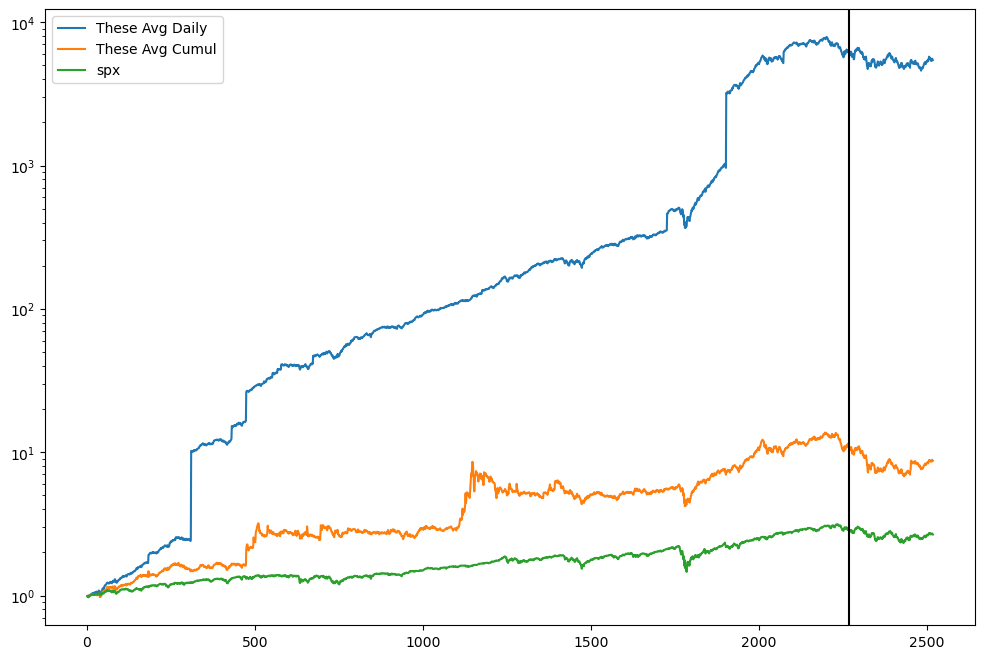

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-02-19,NaN,NaN
1,2013-02-20,0.989037,0.989037
2,2013-02-21,0.982982,0.982602
3,2013-02-22,0.992681,0.991667
4,2013-02-25,0.987245,0.986551


In [10]:
out.tail()

,Date,mine1,mine2
2514,2023-02-13,5416.806982,8.628640
2515,2023-02-14,5437.320345,8.706973
2516,2023-02-15,5567.281600,8.845609
2517,2023-02-16,5475.188200,8.654585
2518,2023-02-17,5432.732902,8.712152


In [11]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

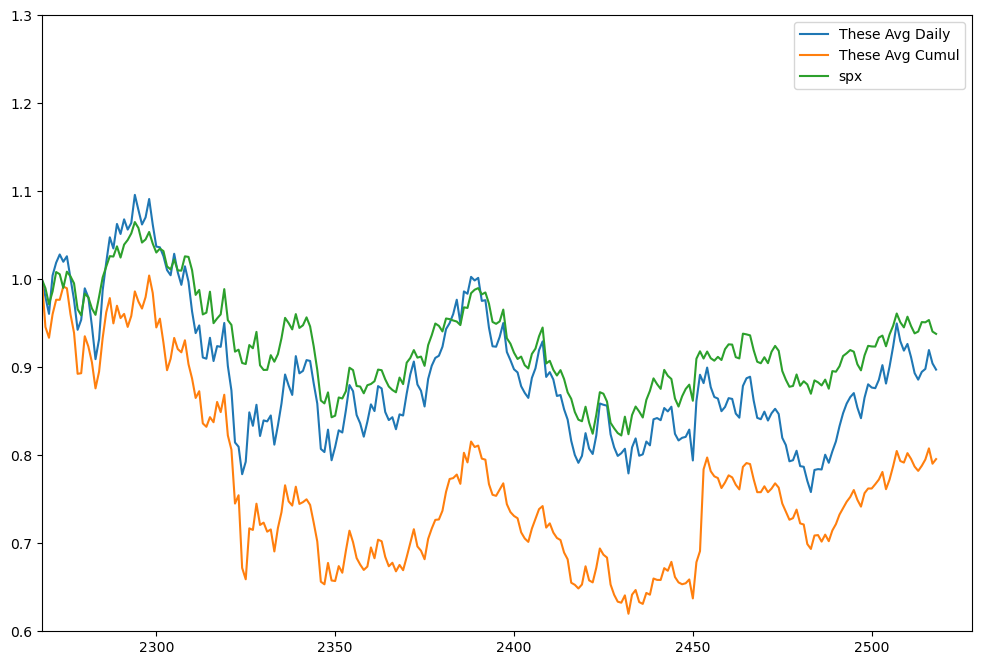

In [12]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.3)
plt.legend();

In [13]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [14]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [15]:
#rblx = get_stock_data('SE', data)
#rblx.head()

In [16]:
#rblx = rblx[['Value', 'Close', 'High', 'Low']]
#rblx.head()

In [17]:
#rblx['NextHigh'] = rblx.High.shift(-1)
#rblx['NextLow'] = rblx.Low.shift(-1)
#rblx['HighMult'] = rblx.NextHigh / rblx.Close
#rblx['LowMult'] = rblx.NextLow / rblx.Close
#rblx.head()

In [18]:
# For selling:
#high_05 = rblx.HighMult.quantile(q=[0.05])
#print(high_05)
#plt.hist(rblx.HighMult)
#plt.axvline(x=high_05[0.05], color='red');

In [19]:
# For buying:
#low_95 = rblx.LowMult.quantile(q=[0.95])
#print(low_95.tolist()[0])
#plt.hist(rblx.LowMult)
#plt.axvline(x=low_95[0.95], color='red');

In [20]:
#get_hilo_mult(rblx), get_hilo_mult(rblx, ci=0.5)

In [21]:
#aapl = get_stock_data('AAPL', data)
#get_hilo_mult(aapl), get_hilo_mult(aapl, ci=0.5)

In [22]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [23]:
#rblx['Trend'] = get_macd(rblx)
#rblx.head()

In [24]:
np.linspace(0.5, 0.95, 5)

array([0.5   , 0.6125, 0.725 , 0.8375, 0.95  ])

In [25]:
CIS = [0.3, 0.4, 0.5, 0.61, 0.73, 0.84, 0.95]

In [26]:
def get_hilo_mults(stock, cis=CIS):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    buy_pts_up = upward.LowMult.quantile(q=cis).tolist()
    sell_pts_up = (
        upward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    buy_pts_down = downward.LowMult.quantile(q=cis).tolist()
    sell_pts_down = (
        downward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    return buy_pts_up + sell_pts_up + buy_pts_down + sell_pts_down

In [27]:
#get_hilo_mults(aapl)

In [28]:
columns = [
    f'{bs}_pt_{ud}_p{int(100*p)}' 
    for ud in ['up', 'down']
    for bs in ['buy', 'sell'] 
    for p in CIS]
#columns

In [29]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock'] + columns)
df.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p73,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95
0,AAPL,0.981228,0.987031,0.989350,0.992735,0.994252,0.997497,1.000263,1.018947,1.015993,...,0.995164,0.999005,1.002676,1.019821,1.011090,1.008303,1.007434,1.004268,1.001296,0.991956
1,ABMD,0.999895,1.000000,1.000000,1.000000,1.000000,1.000000,1.000402,1.000422,1.000000,...,1.000000,1.000000,1.000083,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,ABNB,0.973217,0.977666,0.984187,0.988965,0.993178,1.001058,1.014199,1.032235,1.023858,...,0.996013,1.000874,1.006371,1.031511,1.020330,1.015965,1.011683,1.007869,1.000241,0.987272
3,ACN,0.979910,0.983399,0.987327,0.991028,0.997053,0.999214,1.002545,1.015392,1.010627,...,0.996501,1.000984,1.009219,1.025498,1.016431,1.011950,1.004799,0.999139,0.995369,0.989005
4,ADBE,0.979071,0.982363,0.984559,0.988734,0.992035,0.999306,1.001791,1.018219,1.014203,...,1.001510,1.005941,1.020158,1.034798,1.027929,1.023053,1.019847,1.008299,1.002549,0.994386


In [30]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,152.550003,AAPL
ABMD,NaN,ABMD
ABNB,131.600006,ABNB
ACN,277.049988,ACN
ADBE,356.850006,ADBE
...,...,...
ZM,76.110001,ZM
ZYXI,13.05,ZYXI
^GSPC,4079.090088,^GSPC
^IXIC,11787.271484,^IXIC


In [31]:
prices = df.merge(price, how='left', on='stock')
prices.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
0,AAPL,0.981228,0.987031,0.989350,0.992735,0.994252,0.997497,1.000263,1.018947,1.015993,...,0.999005,1.002676,1.019821,1.011090,1.008303,1.007434,1.004268,1.001296,0.991956,152.550003
1,ABMD,0.999895,1.000000,1.000000,1.000000,1.000000,1.000000,1.000402,1.000422,1.000000,...,1.000000,1.000083,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2,ABNB,0.973217,0.977666,0.984187,0.988965,0.993178,1.001058,1.014199,1.032235,1.023858,...,1.000874,1.006371,1.031511,1.020330,1.015965,1.011683,1.007869,1.000241,0.987272,131.600006
3,ACN,0.979910,0.983399,0.987327,0.991028,0.997053,0.999214,1.002545,1.015392,1.010627,...,1.000984,1.009219,1.025498,1.016431,1.011950,1.004799,0.999139,0.995369,0.989005,277.049988
4,ADBE,0.979071,0.982363,0.984559,0.988734,0.992035,0.999306,1.001791,1.018219,1.014203,...,1.005941,1.020158,1.034798,1.027929,1.023053,1.019847,1.008299,1.002549,0.994386,356.850006


In [32]:
def round_if_float(x):
    if np.isnan(x):
        return -1
    return round(x, 2)

In [33]:
for col in list(prices):
    if col.startswith('buy') or col.startswith('sell'):
        prices[col] *= prices.price
    if col != 'stock':
        prices[col] = prices[col].apply(round_if_float)
prices.set_index('stock', inplace=True)
prices.drop(INDICES, inplace=True)
prices.tail()

,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,sell_pt_up_p50,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
stock,,,,,,,,,,,,,,,,,,,,,
XPEV,8.80,8.91,9.09,9.21,9.33,9.51,9.68,10.37,9.95,9.78,...,9.64,9.73,10.15,10.03,9.88,9.70,9.56,9.51,9.37,9.53
ZBRA,314.64,315.96,316.30,319.28,320.83,322.48,325.02,330.48,329.36,327.37,...,322.41,324.29,331.51,330.19,327.89,326.15,324.27,322.38,318.38,322.58
ZEST,0.20,0.20,0.20,0.21,0.21,0.21,0.22,0.24,0.23,0.23,...,0.22,0.22,0.24,0.24,0.24,0.23,0.23,0.22,0.22,0.22
ZM,73.35,73.74,74.22,74.86,75.08,75.42,76.68,78.45,77.70,77.37,...,75.44,76.31,77.76,77.56,77.21,76.95,76.54,76.19,75.34,76.11
ZYXI,12.69,12.75,12.83,12.91,12.93,12.98,13.01,13.39,13.34,13.32,...,12.98,13.06,13.45,13.37,13.36,13.29,13.22,13.16,13.10,13.05


In [34]:
prices.to_csv('mults.csv')
!open ./mults.csv